<a href="https://colab.research.google.com/github/Subhamnation/Computer_Vision_Masterclass_projects/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import zipfile
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

### Preprocessing of the images

In [68]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject04.centerlight.gif', 'subject08.happy.gif', 'subject02.happy.gif', 'subject08.surprised.gif', 'subject06.glasses.gif', 'subject15.wink.gif', 'subject03.noglasses.gif', 'subject03.normal.gif', 'subject09.surprised.gif', 'subject03.wink.gif', 'subject01.surprised.gif', 'subject11.sleepy.gif', 'subject11.surprised.gif', 'subject04.normal.gif', 'subject07.wink.gif', 'subject11.centerlight.gif', 'subject15.sleepy.gif', 'subject07.centerlight.gif', 'subject03.happy.gif', 'subject04.sleepy.gif', 'subject15.surprised.gif', 'subject03.sleepy.gif', 'subject01.leftlight.gif', 'subject12.happy.gif', 'subject04.sad.gif', 'subject08.glasses.gif', 'subject09.noglasses.gif', 'subject10.normal.gif', 'subject04.rightlight.gif', 'subject14.noglasses.gif', 'subject06.normal.gif', 'subject07.sad.gif', 'subject05.noglasses.gif', 'subject08.wink.gif', 'subject01.sleepy.gif', 'subject09.centerlight.gif', 'subject13.centerlight.gif', 'subject10.glasses.gif', 'subject02.sleepy.gif', 'subject01.rightlig

In [69]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    #print(path)
    image = Image.open(path).convert('L')
    #print(type(image))
    image_np = np.array(image, 'uint8')
    #print(type(image_np))
    id = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
    faces.append(image_np)
    ids.append(id)
    #print(id)
  return np.array(ids), faces

In [70]:
ids, faces = get_image_data()

In [71]:
ids

array([ 4,  8,  2,  8,  6, 15,  3,  3,  9,  3,  1, 11, 11,  4,  7, 11, 15,
        7,  3,  4, 15,  3,  1, 12,  4,  8,  9, 10,  4, 14,  6,  7,  5,  8,
        1,  9, 13, 10,  2,  1,  4, 15, 14,  3,  8,  9,  5, 14, 13,  1, 10,
        3,  2,  5,  5,  5, 12,  5, 13,  8,  8,  2, 15, 11,  8,  4, 12, 13,
        6,  2,  9,  2,  7, 12,  6, 12, 11,  6, 10, 11, 14, 14, 15, 14,  6,
       12,  9, 12,  7, 11,  5,  5, 13,  2,  6, 12,  2,  8, 13, 10,  3, 15,
       12,  7,  9,  5, 10,  1, 15,  6,  7,  3, 11, 10,  2, 13,  7, 10, 14,
        1,  4,  9,  4, 10, 14,  9, 13,  1,  6, 11,  1, 13, 14, 15,  7])

In [72]:
len(ids)

135

In [73]:
faces

[array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 253, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 237, 229],
        [255, 255, 255, ..., 255, 230, 215],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[109, 111, 124, ..., 255, 255, 243],
        [235, 239, 255, ..., 255, 253, 244],
        [253, 255, 255, ..., 253, 251, 243],
        ...,
        [255, 255, 255, ..., 187, 183, 183],
        [255, 255, 255, ..., 183, 180, 179],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [74]:
len(faces)

135

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 253, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
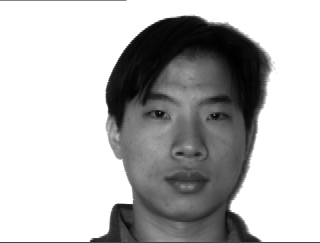

In [75]:
faces[0]

### Training the LBPH classifier

In [76]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

### Recognizing the faces

In [77]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

In [78]:
test_image = '/content/yalefaces/test/subject10.sad.gif'
test_image

'/content/yalefaces/test/subject10.sad.gif'

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
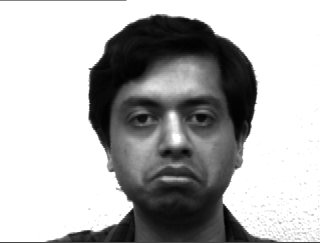

In [79]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np

In [80]:
image_np.shape

(243, 320)

In [81]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 6.384336446373091)

In [82]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
expected_output

10

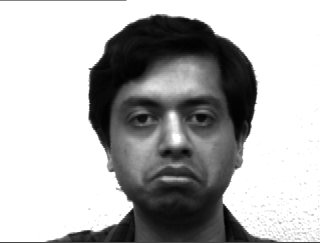

In [83]:
cv2_imshow(image_np)

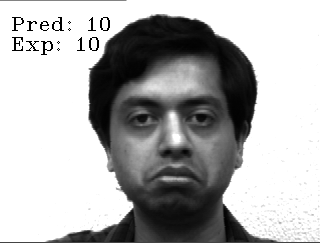

In [84]:
cv2.putText(image_np, 'Pred: ' + str(prediction[0]),(10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(image_np, 'Exp: ' + str(expected_output),(10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(image_np)

### Evaluating the face classifier

In [87]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  #print(path)
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [88]:
type(predictions)

list

In [89]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)


In [90]:
type(predictions)

numpy.ndarray

In [91]:
predictions

array([ 9,  1,  8, 11,  9,  7,  4,  4, 12,  7,  9,  9, 14, 12,  5,  7, 13,
        1,  3,  5,  4, 11, 14,  6,  4, 14, 13,  5, 10, 15])

In [92]:
expected_outputs

array([ 4,  1,  8, 11,  3,  7,  2,  4, 12, 15,  9,  7, 14, 12,  2,  9, 13,
        1,  3,  5, 10, 11, 14,  6,  8,  6, 13,  5, 10, 15])

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.6666666666666666

In [94]:
len(predictions)

30

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(expected_outputs, predictions)

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

<Axes: >

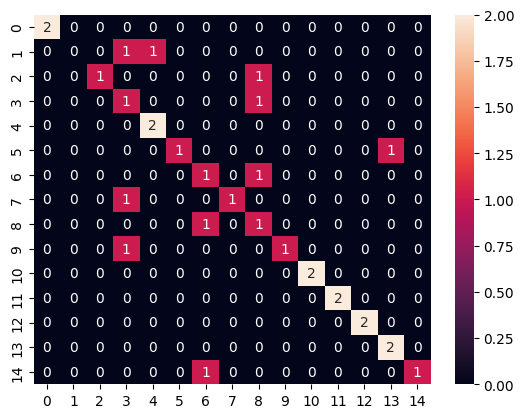

In [97]:
import seaborn as sns
sns.heatmap(confusion_matrix(expected_outputs, predictions), annot=True)